<a href="https://colab.research.google.com/github/taciomattos/taciomattos/blob/main/Code/Trabalho_2_Pensamento_computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Explorar os dados

df = pd.read_csv('avg_rainfalltemp in UK - Sheet1.csv')
df.head()

,Year,Type of period,Period,Avg rainfall(in mm),Avg temp(in centigrade)
0,2010,Monthly,JAN,69.5,0.8
1,2010,Monthly,FEB,71.7,1.6
2,2010,Monthly,MAR,65.1,5.5
3,2010,Monthly,APR,21.4,8.2
4,2010,Monthly,MAY,22.1,9.8


In [56]:
df['Avg rainfall(in mm)'].shape


(170,)

In [57]:
df['Year'].shape

(170,)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     170 non-null    int64  
 1   Type of period           170 non-null    object 
 2   Period                   170 non-null    object 
 3   Avg rainfall(in mm)      170 non-null    float64
 4   Avg temp(in centigrade)  170 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.8+ KB


In [59]:
df.isnull()
df.isna()

,Year,Type of period,Period,Avg rainfall(in mm),Avg temp(in centigrade)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
165,False,False,False,False,False
166,False,False,False,False,False
167,False,False,False,False,False
168,False,False,False,False,False


#Questão	1: Apresente	um	gráfico	que	mostre	a	relação	entre	a	#temperatura	média (Avg	temp	(in	centigrade),	na	horizontal)	e	a	#precipitação	média	#em	milímetros	(Avg rainfall	(in	mm),	na	#vertical),	empregue	um	gráfico	de	dispersão	(scatterplot()).

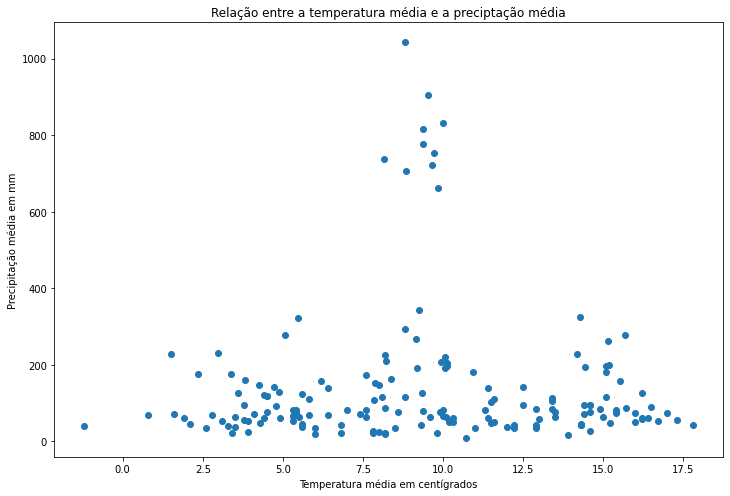

In [60]:
plt.figure(figsize=(12,8))
plt.title('Relação entre a temperatura média e a preciptação média')
plt.xlabel('Temperatura média em centígrados')
plt.ylabel('Precipitação média em mm')
plt.scatter(df['Avg temp(in centigrade)'],df['Avg rainfall(in mm)'])


#Questão	2: Crie	um	gráfico	que	mostre	a	relação	entre	a	temperatura	média	( temp	 (in	 centigrade),	 na	 horizontal)	 e	 a precipitação	 média	 em	 milímetros	 (Avg rainfall	 (in	 mm),	 na	 vertical).	 Porém,	 os	 pontos	 deverão	 possuir	 uma	 coloração segundo	o	tipo	do	período	(coluna	"Type	of	Period").

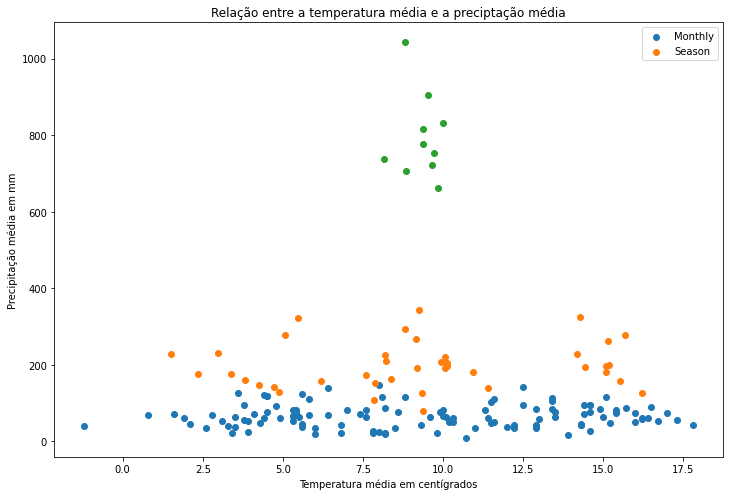

In [61]:
periodo = df['Type of period'].unique()

def filtrar_typeofperiod(tipo, variavel):
  df_filtro = df[df['Type of period'] == tipo][variavel]
  return df_filtro

plt.figure(figsize=(12,8))

for c in periodo:
  plt.title('Relação entre a temperatura média e a preciptação média')
  plt.legend(periodo, loc='best')
  plt.xlabel('Temperatura média em centígrados')
  plt.ylabel('Precipitação média em mm')
  plt.scatter(filtrar_typeofperiod(c,'Avg temp(in centigrade)'),filtrar_typeofperiod(c,'Avg rainfall(in mm)'))

#Questão	 3: Crie	 um	 gráfico	 de	 barras,	 que	 apresente	 a	 temperatura	 média	 (as barras)	em	função	dos	anos,	para	os	períodos	de	inverno	(Winter).

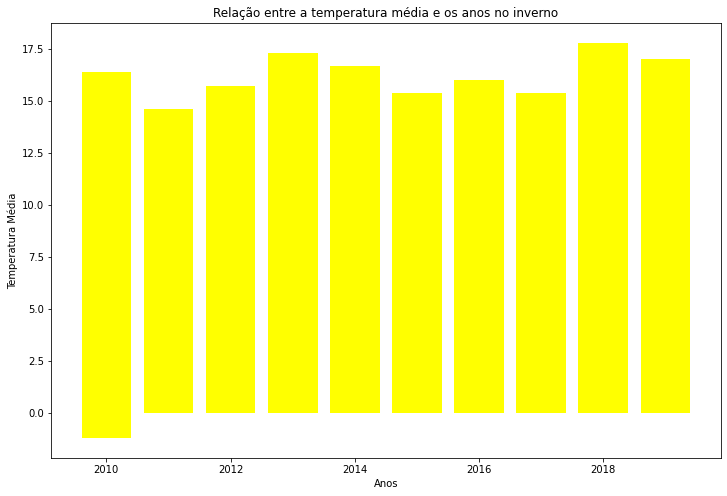

In [62]:
dfq = df

#filtrar os dados para período for inverno
dffilter = dfq['Period'] == 'winter'
filtered_df = dfq[dffilter]

plt.figure(figsize=(12,8))
plt.title('Relação entre a temperatura média e os anos no inverno')
plt.xlabel('Anos')
plt.ylabel('Temperatura Média')
plt.bar(dfq['Year'],dfq['Avg temp(in centigrade)'],color='yellow')
plt.show()


#Questão	 4: Apresente	 um	 histograma	 da	 precipitação	 média	 da	 chuva	 em	milímetros	(Avg	rainfall	(in	mm)), para	todo	o	período	descrito	no	dataset	original.

In [53]:
dfq = df[df['Avg rainfall(in mm)'], df['Period'].astype(str) ]

plt.figure(figsize=(170,170))
plt.title('Histograma de preciptação média')
dfq.hist()

TypeError: ignored

#Questão	 5: Apresente	 um	 histograma	 da	 precipitação	 média	 da	 chuva	 em	milímetros	 (Avg	 rainfall	 (in	 mm)), juntamente	 com	 a	 curva	 de	 densidade	 de	probabilidade	contínua,	para	todo	o	período	descrito	no	dataset	original.

#Questão	 6: Crie	 uma	 figura	 que	 apresente	 a	 precipitação	 média	 da	 chuva	 em	milímetros	 (Avg	 rainfall	 (in	 mm), na	 vertical),	 ao	 longo	 dos	 anos	 (Year, na	horizontal),	o	formato	dos	gráficos	deverá	ser	do	tipo	Boxplot.	Obs:	Teremos	vários gráficos	boxplot,	um	para	cada	ano,	na	mesma	figura.


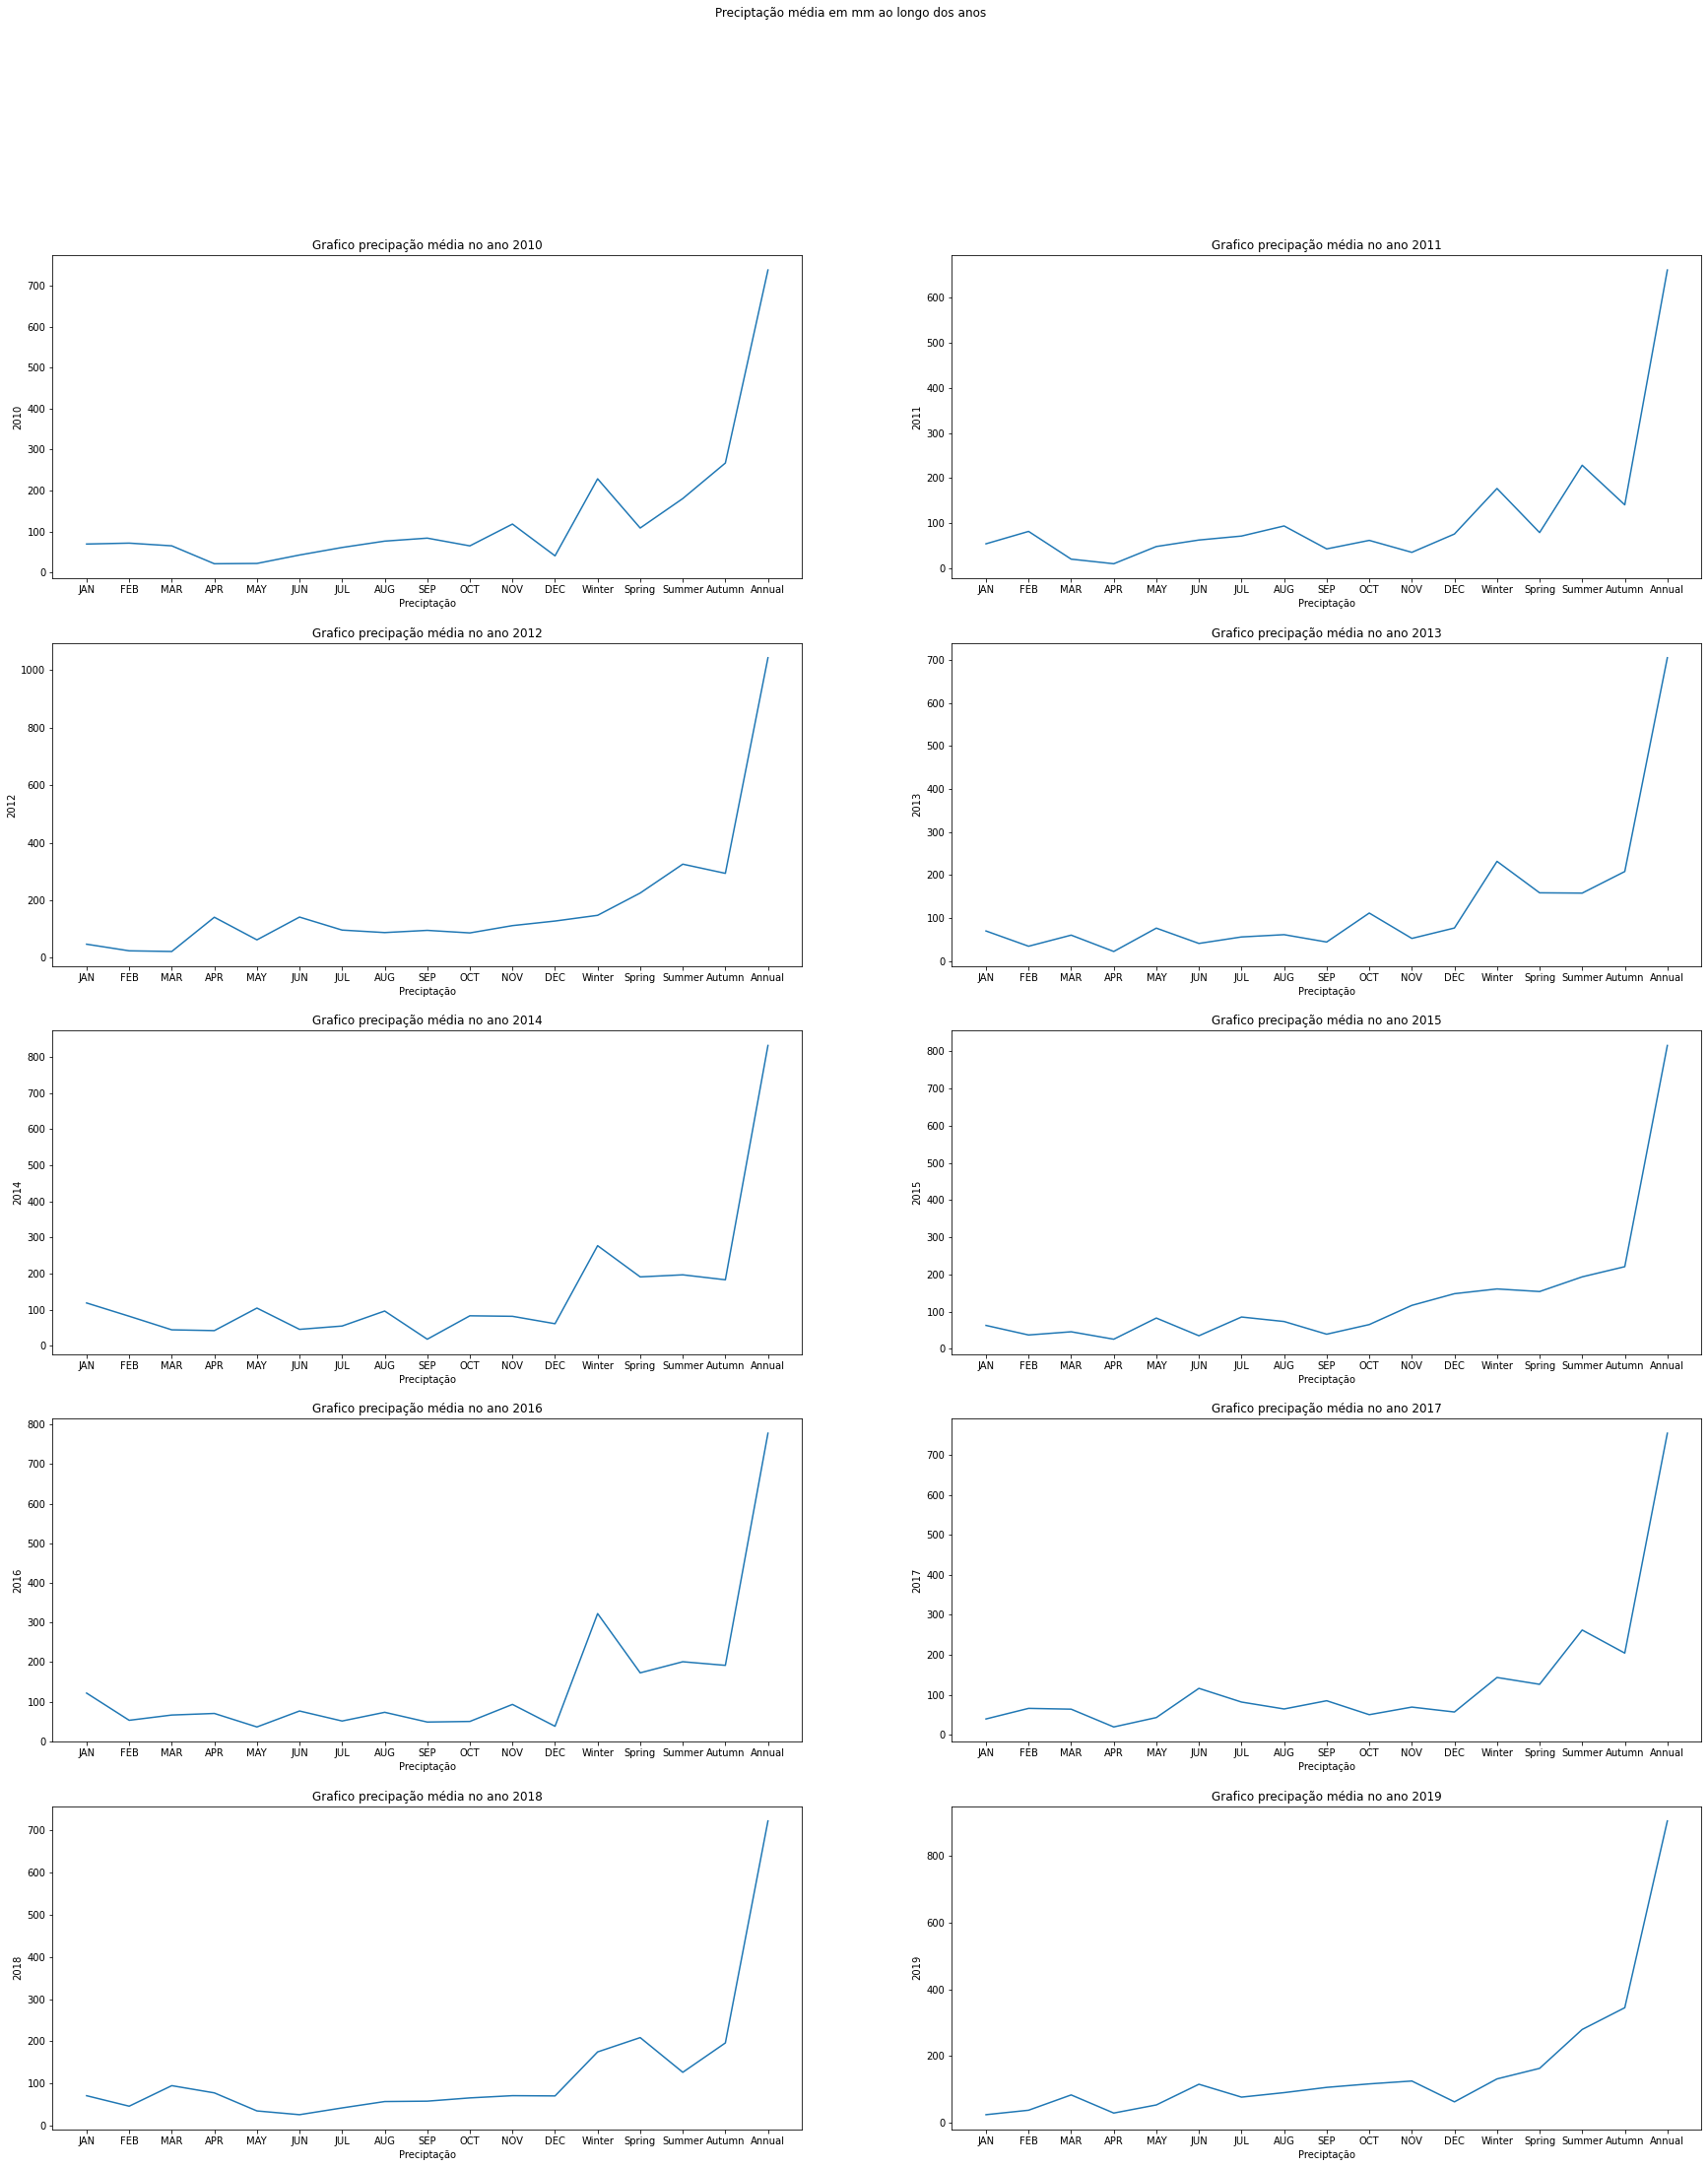

In [15]:
dfq = df
anos = dfq['Year'].unique()


def filtrar_ano(ano, variavel):
  df_filtro = dfq[dfq['Year'] == ano][variavel]
#  print(df_filtro)
  return df_filtro

fig, ax = plt.subplots(5,2,figsize=(30,35))
fig.suptitle('Preciptação média em mm ao longo dos anos')

cont = 0
for i in range(5):
  for j in range(2):
    ax[i][j].plot(filtrar_ano(anos[cont],'Period'),filtrar_ano(anos[cont],'Avg rainfall(in mm)'))
    cont = cont+1

cont = 0
for i in range(5):
  for j in range(2):
    ax[i][j].set(title= f'Grafico precipação média no ano {anos[cont]}', xlabel = 'Preciptação', ylabel = anos[cont] )
    cont = cont+1

fig.show()

#Questão	 7: Crie	 um	 dataframe,	 a	 partir	 do	 dataset original,	 cujas	 linhas	correspondam	a	todas	as	ocorrências	da	palavra	"Montly" na	coluna	"Type	of	period". Obs.:	Cada	linha,	obviamente,	deverá	conter	as	informações	(colunas)	a	respeito	de "Year",	"Type	of	period",	"Avg	rainfall(in	mm)" e	"Avg	temp(in	centigrade)".

In [52]:

df_filtro = df['Type of period'] == "Montly"
df_filtro

0      False
1      False
2      False
3      False
4      False
       ...  
165    False
166    False
167    False
168    False
169    False
Name: Type of period, Length: 170, dtype: bool